In [42]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from random import randint
import timeit
%matplotlib inline

Решение системы вида $Ax = b$ обратным ходом метода Гауса. 

In [43]:
def solve_Ax_b(A, b, left_triangle_A=False):
    assert(A.shape[0] == A.shape[1] == b.shape[0])
    order = A.shape[0]
    solution = np.zeros(shape=(order, 1), dtype=np.double)
    for i in range(order) if left_triangle_A else reversed(range(order)):
        current_sol = b[i] / A[i,i]
        for j in range(i + 1, order) if left_triangle_A else range(i):
            b[j] -= b[i] * A[j, i] / A[i, i]
        solution[i] = current_sol
    return solution

Функция, случайным образом генерирующая квадратную матрицу с ненулевым определителем необходимого размера $order$.

In [44]:
def generate_quadratic_matrix(order):
    assert(order >= 1)
    matrix = np.matrix([[0] * (order + 1)] * order, dtype=float)
    for i in range(order):
        for j in range(order + 1):
            matrix[i, j] = randint(1, 50)
    return matrix

Функция, генерирующая симметричную квадратную матрицу с ненулевым определителем порядка $order.$

In [45]:
def generate_symmetric_matrix(order):
    assert(order >= 1)
    matrix = np.matrix([[0] * (order + 1)] * order, dtype=float)
    for j in range(order):
        matrix[j, order] = randint(1, 50)
        for i in range(j, order):
            matrix[i, j] = matrix[j, i] = randint(1,  50)
    return matrix

# Задание 1. 

$\text{Условие:}$ Написать программу, которая строит $𝐿𝑈$- и $𝐿𝐷𝐿^𝑇$-разложения симметричной матрицы $𝐴$ и решает СЛАУ $𝐴𝑥 = 𝑏$ с использованием полученных разложений. Провести эксперимент по сравнению эффективности этих методов: решить тестовые системы (со 
случайными симметричными матрицами) размерности 400, 800, 1200, 1600, 2000 и изобразить совмещенные графики зависимости времени работы каждого метода от размерности системы.

Функция, строящая $LU$-разложение для матрицы.

In [47]:
def LU(matrix):
    '''
    After executing the function, the upper right triangle of the original 
    matrix contains U, and the lower left triangle contains the elements of L.
    '''
    assert(matrix.shape[0] == matrix.shape[1] - 1)
    order = matrix.shape[0]
    for j in range(order):
        for i in range(order):
            matrix[i, j] -= sum(matrix[i, k] * matrix[k, j] for k in range(min(i, j)))
            if i > j:
                matrix[i, j] = matrix[i, j] / matrix[j, j]
                

def create_L(matrix):
    for i in range(matrix.shape[0]):
        matrix[i, i] = 1
    return matrix[:, :matrix.shape[1] - 1]

Функция, строящая $LDL^T$-разложение для матрицы.

In [48]:
def LDLT(matrix):
    '''
    Returns an array with diagonal elements of matrix D. 
    The original matrix in the upper triangle contains the matrix L^T.
    '''
    order = matrix.shape[0]
    D = [0] * order
    for k in range(order):
        for i in range(k + 1, order):
            matrix[i, i : order] -= round((matrix[k, i] / matrix[k, k]), 9) * matrix[k, i : order]
        matrix[k, k + 1 : order] = matrix[k, k + 1 : order] / matrix[k, k]
        D[k] = matrix[k, k]
        matrix[k, k] = 1
    return D

Функции, решающие системы уравнений для $LU$- и $LDL^T$-разложений соответственно обратным методом Гаусса.

In [49]:
def LU_solve_whole_system(matrix):
    LU(matrix)
    return solve_Ax_b(matrix[:, :matrix.shape[1] - 1], solve_Ax_b(create_L(matrix.copy()), matrix[:, matrix.shape[1] - 1].copy(), True))


def LDLT_solve_whole_system(matrix):
    D = LDLT(matrix)
    x_1 = solve_Ax_b(matrix[:, :matrix.shape[1] - 1], matrix[:, matrix.shape[1] - 1].copy())
    for i in range(matrix.shape[0]):
        x_1[i] *= D[i]
    return solve_Ax_b(matrix[:, :matrix.shape[1] - 1].transpose(), x_1, True)

Функция, принимающая на вход размерность симметричной матрицы и возвращающая время решения системы линейных уравнений через $LU$, $LDL^T$ разложения. 

In [106]:
list_of_orders = [150 * i for i in range(1, 15)]
list_of_time_for_LU = []
list_of_time_for_LDLT = []


def solving_time_LU_LDLT(order):
    matrix = generate_symmetric_matrix(order)
    result = %timeit -n1 -r1 -o -q -p0 LU_solve_whole_system(matrix.copy())
    list_of_time_for_LU.append(result.compile_time)
    print('LU no.', order, '--', list_of_time_for_LU[-1] * (10 ** 3))
    result = %timeit -n1 -r1 -o -q -p0 LDLT_solve_whole_system(matrix)
    list_of_time_for_LDLT.append(result.compile_time)
    print('LDLT no.', order, '--', list_of_time_for_LDLT[-1] * (10 ** 3))
    
    
for order in list_of_orders:
    solving_time_LU_LDLT(order)

LU no. 150 -- 0.14029999147169292
LDLT no. 150 -- 0.03670000296551734
LU no. 300 -- 0.03809999907389283
LDLT no. 300 -- 0.03710000601131469
LU no. 450 -- 0.03949999518226832
LDLT no. 450 -- 0.03920000744983554
LU no. 600 -- 0.0408000050811097
LDLT no. 600 -- 0.03919999289792031
LU no. 750 -- 0.042100000428035855
LDLT no. 750 -- 0.057900004321709275
LU no. 900 -- 0.05149999924469739
LDLT no. 900 -- 0.04350001108832657
LU no. 1050 -- 0.043199994252063334
LDLT no. 1050 -- 0.0475000124424696
LU no. 1200 -- 0.04499999340623617
LDLT no. 1200 -- 0.054100004490464926
LU no. 1350 -- 0.04539999645203352
LDLT no. 1350 -- 0.05219999002292752
LU no. 1500 -- 0.04639998951461166
LDLT no. 1500 -- 0.04060000355821103
LU no. 1650 -- 0.03989999822806567
LDLT no. 1650 -- 0.038700003642588854
LU no. 1800 -- 0.04060000355821103
LDLT no. 1800 -- 0.038700003642588854
LU no. 1950 -- 0.041100007365457714
LDLT no. 1950 -- 0.039000005926936865
LU no. 2100 -- 0.04130000888835639
LDLT no. 2100 -- 0.0504000054206699

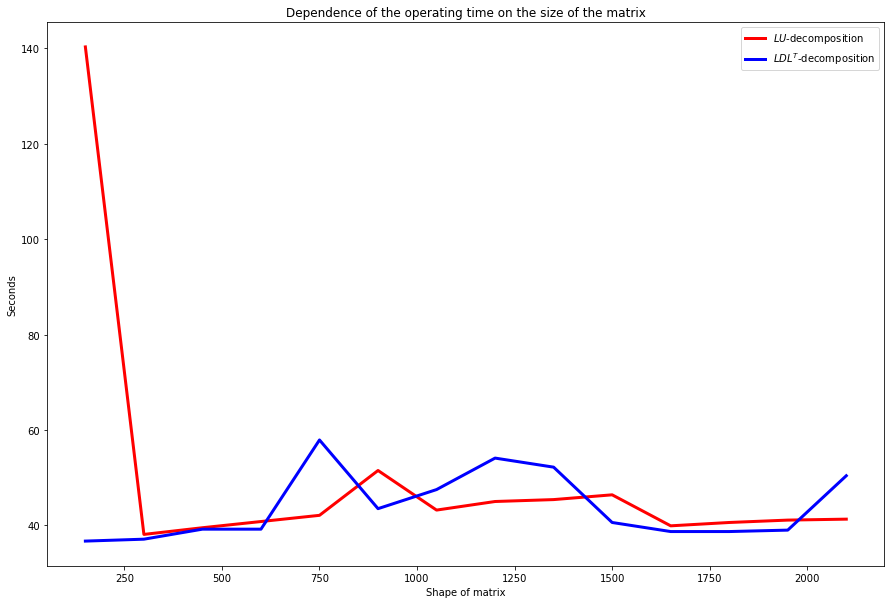

In [109]:
plt.figure(figsize=[15, 10])
plt.plot(list_of_orders, [t * (10 ** 6) for t in list_of_time_for_LU], color='red', linewidth=3, label='$LU$-decomposition')
plt.plot(list_of_orders, [t * (10 ** 6) for t in list_of_time_for_LDLT], color='blue', linewidth=3, label='$LDL^T$-decomposition')
plt.ylabel('Seconds')
plt.xlabel('Shape of matrix')
plt.title('Dependence of the operating time on the size of the matrix')
plt.legend()
plt.show()

In [118]:
average_value = sum(list_of_time_for_LU[i] / list_of_time_for_LDLT[i] for i in range(10)) / 10

round(average_value, 2)

1.14

# Задание 2

Условие: Написать программу, которая решает СЛАУ $Ax = b$ типа
$$
    A = \begin{pmatrix}
            n & 1 & 1 & \dots & 1 & 1 \\
            1 & n & 0 & \dots & 0 & 1 \\
            1 & 0 & n & \dots & 0 & 1 \\
            \; & \dots & \; & \dots & \; & \dots \\
            1 & 1 & 1 & \dots & 1 & n
        \end{pmatrix}, \;\;\; 
    b = \begin{pmatrix}
            1 \\
            1 \\
            1 \\
            \dots \\
            1
        \end{pmatrix}
$$
методом Гаусса-Зейделя и обобщенным методом минимальных невязок (GMRES). При 
реализации следует учитывать структуру матрицы, то есть запрещается хранить в 
памяти ее избыточные нулевые элементы. В отчет включить обоснование сходимости 
метода Гаусса-Зейделя для данных матриц. Получить решения системы размерности 
500, 1000, 2000, 4000 и изобразить совмещенные графики зависимости времени 
работы каждого метода от размерности системы. Указать количество сделанных 
итераций обоих методов. Критерий остановки итераций: $||Ax^{(k)} - b|| < 10^{-10}.$

Класс, хранящий матрицу вышеуказанного вида как размерность матрицы и значение ее диагонального элемента.

In [50]:
class MagicMatrix:
    def __init__(self, shape, n):
        self.shape = shape
        self.diagonal_element = n
        
    def get(self, x, y):
        assert(0 <= x <= self.shape and 0 <= y <= self.shape)
        if x == y:
            return self.diagonal_element
        elif x == 0 or y == 0 or x == self.shape - 1 or y == self.shape - 1:
            return 1
        else:
            return 0
        
    def dot(self, vector):
        assert(self.shape == vector.shape[0])
        result = np.zeros(shape=(self.shape, 1), dtype=np.double)
        result[0] = self.diagonal_element * vector[0] + sum(vector[i] for i in range(1, self.shape))
        result[self.shape - 1] = self.diagonal_element * vector[self.shape - 1] + sum(vector[i] for i in range(self.shape - 1))
        for i in range(1, self.shape - 1):
            result[i] = vector[0] + vector[self.shape - 1] + self.diagonal_element * vector[i]
        return result        

Функция, проводящая одну итерацию алгоритма Арнольди.

In [55]:
def Arnoldi_step(M, k):
    j = k
    z = M.dot(Q[:, [j]])
    for i in range(j + 1):
        H[i, j] = np.dot(z.transpose(), Q[:, [i]])
        z -= H[i, j] * Q[:, [i]]
    H[j + 1, j] = np.linalg.norm(z)
    if abs(H[j + 1, j]) <= 10 ** (-10):
        return Q[:, :j], H[:j, :]
    Q[:, [j + 1]] = z / H[j + 1, j]
    return Q[:, :j + 1], H[:, :j + 1]

Функция для решения задачи наименьших квадратов.

In [177]:
def Least_squares_solve(A, b):
    LHS = np.dot(A.transpose(), A)
    if A.shape == (1, 1) or (1, 0):
        RHS = A[0] * b
    else:
        RHS = np.dot(A.transpose(), b)
    LHS = np.append(LHS, RHS, axis=1)
    return LU_solve_whole_system(LHS)

Функции, реализующая алгоритм GMRES с точностью $||Ax^{(k)} - b|| < 10^{-10}.$

In [69]:
def GMRES_solver(M):
    order = M.shape
    k = 0
    x = np.zeros(order, dtype=np.double).reshape((order, 1))
    while abs(np.linalg.norm(M.dot(x) - b)) >= 10 ** (-9):
        Q, H = Arnoldi_step(M, k)
        d_k = np.zeros(order).reshape((order, 1))
        d_k[0, 0] = np.sqrt(order)
        y = Least_squares_solve(H, d_k)
        if y.shape == (1, 1):
            x = y * Q
        else:
            x = np.dot(Q, y)
        if np.linalg.norm(M.dot(x) - b) <= 10 ** (-9):
            return x
        else:
            k += 1

Реализация алгоритма Гаусса-Зейделя:

In [88]:
def GS_step(M, x):
    order = M.shape
    new_x = np.zeros(shape=(order, 1), dtype=np.double)
    for i in range(order):
        new_x[i] = (b[i] - sum(M.get(i, j) * new_x[j] for j in range(i)) - sum(M.get(i, j) * x[j] for j in range(i + 1, order))) / M.get(i, i)
    return new_x


def GS_solver(M):
    order = M.shape
    k = 0
    x = np.zeros(shape=(order, 1), dtype=np.double)
    while np.sqrt(sum((M.dot(x) - b)[i] ** 2 for i in range(order))) >= 10 ** (-9):
        x = GS_step(M, x)
        k += 1
    return x

Вычисление времени работы метода GMRES и Гаусса-Зейделя соответственно:

In [99]:
list_of_orders = [150 * i for i in range(1, 15)]
list_of_time_for_GS = []
list_of_time_for_GMRES = []


def solving_time_GMRES_GS(order):
    matrix = MagicMatrix(order, order)
    b = np.ones(order).reshape((order, 1))
    Q = np.zeros(order * order, dtype=np.double).reshape((order, order))
    H = np.zeros(order * order, dtype=np.double).reshape((order, order))
    Q[:, [0]] = b / np.sqrt(order)
    result = %timeit -n1 -r1 -o -q -p0 GMRES_solver(matrix)
    list_of_time_for_GMRES.append(result.compile_time)
    print('GMRES no.', order, ' -- ', list_of_time_for_GMRES[-1] * (10 ** 3))
    result = %timeit -n1 -r1 -o -q -p0 GS_solver(matrix)
    list_of_time_for_GS.append(result.compile_time)
    print('GS no.', order, ' -- ', list_of_time_for_GS[-1] * (10 ** 3))


for order in list_of_orders:
    solving_time_GMRES_GS(order)

GMRES no. 150  --  0.047900000936351717
GS no. 150  --  0.041099992813542485
GMRES no. 300  --  0.03779999678954482
GS no. 300  --  0.03670000296551734
GMRES no. 450  --  0.037300007534213364
GS no. 450  --  0.03680000372696668
GMRES no. 600  --  0.038700003642588854
GS no. 600  --  0.03809999907389283
GMRES no. 750  --  0.039699996705166996
GS no. 750  --  0.038300000596791506
GMRES no. 900  --  0.03710000601131469
GS no. 900  --  0.03599999763537198
GMRES no. 1050  --  0.04430000262800604
GS no. 1050  --  0.04060000355821103
GMRES no. 1200  --  0.03989999822806567
GS no. 1200  --  0.03739999374374747
GMRES no. 1350  --  0.039300008211284876
GS no. 1350  --  0.03850000211969018
GMRES no. 1500  --  0.04020000051241368
GS no. 1500  --  0.03850000211969018
GMRES no. 1650  --  0.039699996705166996
GS no. 1650  --  0.037300007534213364
GMRES no. 1800  --  0.03860000288113952
GS no. 1800  --  0.036600002204068005
GMRES no. 1950  --  0.04189999890513718
GS no. 1950  --  0.039399994420818985


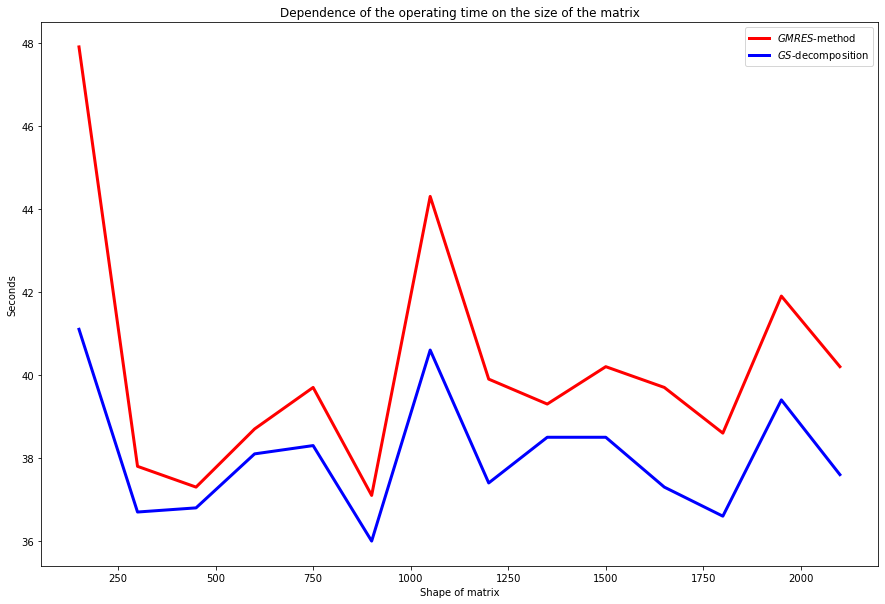

In [116]:
plt.figure(figsize=[15, 10])
plt.plot(list_of_orders, [t * (10 ** 6) for t in list_of_time_for_GMRES], color='red', linewidth=3, label='$GMRES$-method')
plt.plot(list_of_orders, [t * (10 ** 6) for t in list_of_time_for_GS], color='blue', linewidth=3, label='$GS$-decomposition')
plt.ylabel('Seconds')
plt.xlabel('Shape of matrix')
plt.title('Dependence of the operating time on the size of the matrix')
plt.legend()
plt.show()

# Задание 3.

Условие: Написать программу, которая решает СЛАУ $Ax = b$ с разреженной матрицей $A$
методом Гаусса с выбором главного элемента по столбцу и обобщенным методом 
минимальных невязок (GMRES). Попытаться использовать факт разреженности для 
оптимизации алгоритмов. Подробно изложить в отчете все мысли по этому поводу. 
Получить решения систем с невырожденной матрицей размерности 1000 с различной 
степенью разреженности $(0\%, 50\%, 90\%, 95\%, 99\%)$. Изобразить совмещенные 
графики зависимости времени работы каждого метода от разреженности системы. 
Критерий остановки итераций обобщенного метода минимальных невязок: $||Ax - b|| < 10^{-10}.$

Функция для генерации матрицы с требуемой степенью разреженности.

In [111]:
def generate_sparse_matrix(order, sparseness):
    """
    Generate sparse matrix in DOK format.
    """
    value_dict = dict()
    if sparseness == 0:
        for i in range(order):
            for j in range(order + 1):
                value_dict[(i, j)] = randint(1, 50)
        return DOCMatrix(order, value_dict)

    num_of_nonzero_elements = int(order * order * (100 - sparseness))
    for i in range(num_of_nonzero_elements):
        x, y = randint(0, order + 1), randint(0, order)
        if (x, y) not in value_dict.keys():
            value_dict[(x, y)] = randint(1, 50)
        else:
            while y <= order or (x, y) in value_dict.keys():
                y += 1
            value_dict[(x, y)] = randint(1, 50)
    return DOCMatrix(order, value_dict)

Класс, хранящий разреженную матрицу.

In [165]:
class DOCMatrix:
    def __init__(self, order, value_dict):
        self.order = order
        self.value_dict = value_dict
        self.swap_order = list(range(order))

    def get(self, x, y):
        if (x, y) in self.value_dict.keys():
            return self.value_dict[(x, y)]
        else:
            return 0

    def dot(self, vector):
        assert (self.order == vector.shape[0])
        result = np.zeros(shape=(self.order, 1), dtype=np.double)
        for i in range(order):
            result[i] = sum(self.get(i, j) * vector[j] for j in range(self.order))
        return result

    def swap_rows(self, i, k): 
        for j in range(self.order + 1):
            if (i, j) in self.value_dict.keys() and (k, j) in self.value_dict.keys():
                self.value_dict[(i, j)], self.value_dict[(k, j)] = self.value_dict[(k, j)], self.value_dict[(i, j)]
            elif self.get(i, j) == 0 and (k, j) in self.value_dict.keys():
                self.value_dict[(i, j)] = self.get(k, j)
                self.value_dict.pop((k, j))
            elif (i, j) in self.value_dict.keys():
                self.value_dict[(k, j)] = self.get(i, j)
                self.value_dict.pop((i, j))

    def choose_max_in_column(self, num_of_iteration): 
        sub_column = [item for item in self.value_dict.items() if (item[0][1] == num_of_iteration and
                                                                   item[0][0] >= num_of_iteration)]
        sub_column.sort(key=lambda x: x[1], reverse=True)
        max_elem_key = sub_column[0][0]
        self.swap_rows(max_elem_key[0], num_of_iteration)

    def subtract_rows(self, i, j, coeff):
        for k in range(0, self.order + 1):
            if self.get(j, k) == 0:
                pass
            elif (i, k) in self.value_dict.keys() and (j, k) in self.value_dict.keys():
                self.value_dict[(i, k)] = round(self.value_dict[(i, k)] - self.get(j, k) * coeff, 2) ##############
            else:
                self.value_dict[(i, k)] = -self.get(j, k) * coeff
            if (i, k) in self.value_dict.keys() and abs(self.value_dict[(i, k)]) < (10 ** (-1)): ######################3
                self.value_dict.pop((i, k))

    def print(self):
        print('-------')
        for i in range(self.order):
            for j in range(self.order + 1):
                print(self.get(i, j), end=' ')
            print('\n')
        print('-------')

Функция, реализующая алгоритм Гаусса с выбором главного элемента по столбцу. 

In [114]:
def Gaussian_solver(M):
    order = M.order
    for k in range(order):
        M.choose_max_in_column(k)
        if M.get(k, k) != 0:
            for i in range(k + 1, order):
                M.subtract_rows(i, k, coeff=M.get(i, k) / M.get(k, k))
    solution = np.zeros(shape=(order, 1), dtype=np.double)
    for i in reversed(range(order)):
        solution[i] = round(M.get(i, order) / M.get(i, i), 2) ######################
        for j in range(i):
            M.subtract_rows(j, i, M.get(j, i) / M.get(i, i))
    return solution

Функция для реализации метода GMRES.

In [173]:
def Arnoldi_S_step(M, k):
    j = k
    z = M.dot(Q[:, [j]])
    for i in range(j + 1):
        H[i, j] = np.dot(z.transpose(), Q[:, [i]])  # check (z, q_i)
        z -= H[i, j] * Q[:, [i]]
    H[j + 1, j] = np.linalg.norm(z)
    if H[j + 1, j] <= 10 ** (-10)
        return Q[:, :j], H[:j, :]
    Q[:, [j + 1]] = z / H[j + 1, j]
    return Q[:, :j + 1], H[:j, :j + 1]


def GMRES_S_solver(M, H, Q):
    order = M.order
    B = np.zeros(order, dtype=np.double).reshape((order, 1))
    for i in range(order):
        B[i] = M.get(i, order)
        M.value_dict.pop((i, order))
    k = 0
    Q[0, 0] = np.linalg.norm(B)
    x = np.zeros(order, dtype=np.double).reshape((order, 1))
    print(M.order, x.shape, B.shape)
    while abs(np.linalg.norm(M.dot(x) - B)) > 10 ** (-10):
        Q, H = Arnoldi_S_step(M, k)
        d_k = np.zeros(order).reshape((order, 1))
        d_k[0, 0] = np.linalg.norm(B)
        y = Least_squares_solve(H, d_k)
        if y.shape == (1, 1):
            x = y * Q
        else:
            x = np.dot(Q, y)
        if np.linalg.norm(M.dot(x) - B) <= 10 ** (-10):
            return x
        else:
            k += 1

Выичсление времени компиляции для метода Гаусса с выбором главного элемента.

In [185]:
list_of_sparseness = [0, 20, 50, 90, 95, 99]
list_of_time_for_GAUSS = []


def solving_time_GAUSS(sparseness):
    matrix = generate_sparse_matrix(400, sparseness)
    result = %timeit -n1 -r1 -o -q -p0 Gaussian_solver(matrix)
    list_of_time_for_GAUSS.append(result.compile_time)
    print('GAUSS no.', sparseness, ' -- ', list_of_time_for_GAUSS[-1] * (10 ** 3))

    
for s in list_of_time_for_GAUSS:
    solving_time_GAUSS(s)

0.7435999868903309
0.5469999450724572
0.6116000149631873
0.48149999929592013
0.3885000041918829
0.4440000047907233


Вычисление времени работы алгоритма GMRES для разреженных матриц.

In [ ]:
list_of_sparseness = [0, 20, 50, 90, 95, 99]
list_of_time_for_S_GMRES = []


def solving_time_GMRES_S(sparseness):
    order = 100
    matrix = generate_sparse_matrix(order, sparseness)
    Q = np.zeros(order * order, dtype=np.double).reshape((order, order))
    H = np.zeros(order * order, dtype=np.double).reshape((order, order))
    result = %timeit -n1 -r1 -o -q -p0 GMRES_S_solver(matrix, H, Q)
    list_of_time_for_S_GMRES.append(result.compile_time)
    print('GMRES no.', sparseness, ' -- ', list_of_time_for_GMRES_S[-1] * (10 ** 3))
    

for s in list_of_sparseness:
    solving_time_GMRES_S(s)

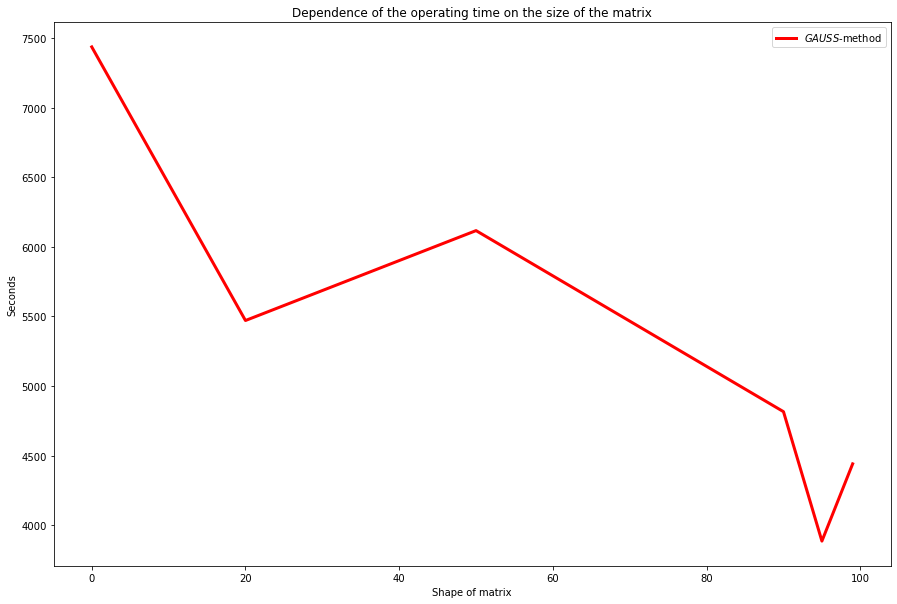

In [188]:
plt.figure(figsize=[15, 10])
plt.plot(list_of_sparseness, [t * (10 ** 4) for t in list_of_time_for_GAUSS], color='red', linewidth=3, label='$GAUSS$-method')

plt.ylabel('Seconds')
plt.xlabel('Shape of matrix')
plt.title('Dependence of the operating time on the size of the matrix')
plt.legend()
plt.show()